# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

In [56]:
results = []

for i in range(10000):
    choice_list = [1, 2, 3]
    
    # Pick the door behind which the car will reside
    car_door = np.random.choice(choice_list)

    # represents the contestant's initial door choice. We don't know what is behind it yet
    initial_choice = np.random.choice(choice_list)
    
    # from remaining doors, we will choose one which is not the car 
    # and wasn't chosen by the contestant. First we'll remove the choices that
    # were either already picked by the contestant, or have the car
    choice_list.remove(car_door)
    if initial_choice != car_door:
        choice_list.remove(initial_choice)
    
    # from the remaining choices (there may only be one!) pick the goat door
    # to reveal to the contestant
    goat_door = np.random.choice(choice_list)
    
    # This is the list of doors not revealed, minus door already revealed
    # from which the contestant can choose a new door or go with the one they initially had
    rem_choices = [1, 2, 3]
    rem_choices.remove(goat_door)
    final_choice = np.random.choice(rem_choices)
    
    if final_choice != initial_choice:
        switched = True
    else:
        switched = False
        
    if final_choice == car_door:
        won = 1
    else:
        won = 0
    
    results.append([i, switched, won])
    
    #print(car_door, initial_choice, goat_door, final_choice, switched, won)

    test_num  switched  won
0          0     False    1
1          1      True    1
2          2     False    0
3          3      True    0
4          4      True    1
5          5     False    0
6          6      True    1
7          7      True    0
8          8      True    0
9          9      True    0
10        10      True    0
11        11     False    1
12        12     False    1
13        13     False    0
14        14      True    1


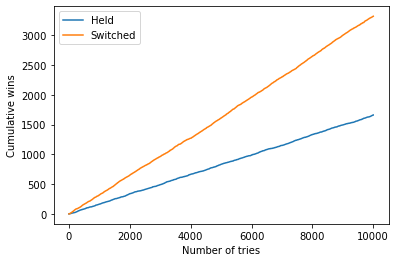

In [59]:
df = pd.DataFrame(results, columns=['test_num', 'switched', 'won'])
print(df.head(15))

switched_results = np.cumsum(df[df['switched']]['won'])
held_results = np.cumsum(df[~df['switched']]['won'])

fig, ax = plt.subplots()
sns.lineplot(x=held_results.index, y=held_results, label="Held")
sns.lineplot(x=switched_results.index, y=switched_results, label="Switched")
ax.set_xlabel('Number of tries')
ax.set_ylabel('Cumulative wins')
ax.legend;

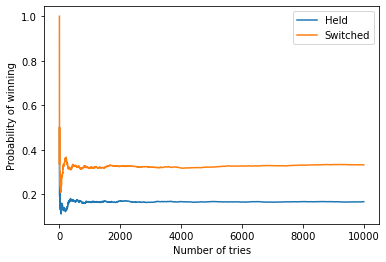

In [58]:
switched_results_p = switched_results / switched_results.index
held_results_p = held_results / held_results.index

fig, ax = plt.subplots()
sns.lineplot(x=held_results_p.index, y=held_results_p, label="Held")
sns.lineplot(x=switched_results_p.index, y=switched_results_p, label="Switched")
ax.set_xlabel('Number of tries')
ax.set_ylabel('Probability of winning')
ax.legend;

My answer is pretty similar to the solution answer. The difference was that they kept two separate lists for switched versus kept/held. There was a data point for all 10k tries in both lists. They used np.mean() on slices [:i] i=0 to 10k because the mean is the cumulative probability when the value is 0 or 1: sum of all 1's, divided by the number of values.

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 